## SMDA Final Project (01 - preprocessing) - Agustina Pesce

The notebook has been set to run for replication without the calculation of the dictionaries count variables, which was the most time consumming process. However, the datasets outputed by implementing these dictionaries are imported in the notebook's final cell.

In [109]:
#Libraries 

#Dataframes use
import pandas as pd
import numpy as np

#Object saving
import pickle

#Data visualization
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

#Scraping of congress members names (now tables are imported from .csv file)
#import requests
#from bs4 import BeautifulSoup

#Regular expressions for dictionary implementation
import re

#Performing text tokenization
#import nltk
#from nltk.corpus import stopwords

#Track processing time with ".progress_apply"
from tqdm import tqdm
tqdm.pandas()

In [110]:
re.__version__

'2.2.1'

TEST of data retrieval format (before big data retrieval)

In [111]:
#File import
first_file = pd.read_csv('data_crowdt/2023-07-30-16-58-27-CEST-Historical-Report-USA-Media---SMDA-Project-2022-07-30--2023-07-30.csv')

#Rename column with long name
first_file = first_file.rename(columns={"Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )": "Overperforming Score"})

In [112]:
#Get df length, column names and preview
print(len(first_file))
print(first_file.columns)
first_file.head(3)

1000
Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Overperforming Score'],
      dtype='object')


,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Overperforming Score
0,The American Spectator,americanspectator,100064326234306,NEWS_SITE,US,Providing the wittiest conservative commentary...,2010-06-03 17:41:47,126933,125815,2023-07-30 14:00:50 CEST,...,DeSantis' campaign is headed for self-destruct...,https://spectator.org/the-desantis-campaign-ne...,http://spectator.org/the-desantis-campaign-nee...,NaN,The DeSantis Campaign Needs a Better Message -...,Ron DeSantis launched his presidential campaig...,NaN,NaN,NaN,-0.94
1,The American Spectator,americanspectator,100064326234306,NEWS_SITE,US,Providing the wittiest conservative commentary...,2010-06-03 17:41:47,126940,125807,2023-07-30 01:00:21 CEST,...,McCarthy talks about expunging Trump impeachme...,https://spectator.org/speaker-mccarthy-trump-a...,http://spectator.org/speaker-mccarthy-trump-an...,NaN,"Speaker McCarthy, Trump, and the Andrew Jackso...",President Andrew Jackson’s enemies hated him. ...,NaN,NaN,NaN,-5.50
2,The American Spectator,americanspectator,100064326234306,NEWS_SITE,US,Providing the wittiest conservative commentary...,2010-06-03 17:41:47,126940,125807,2023-07-30 00:00:24 CEST,...,Listen to the latest episode of The Spectacle ...,https://spectator.org/the-spectacle-ep-37-bide...,http://spectator.org/the-spectacle-ep-37-biden...,NaN,The Spectacle Ep. 37: Biden: What a Paid-Off P...,What does it mean when the president of the Un...,NaN,NaN,NaN,-2.56


In [113]:
#Info on what columns mean:
#https://help.crowdtangle.com/en/articles/3213537-crowdtangle-codebook

#Page info
#print(first_file['Page Name'][0])
print(first_file['User Name'][0])
#print(first_file['Page Category'][0]) #NEWS_SITE #Self-described
print()

#Post identifier
print(first_file['URL'][0]) 
print()

#Controls
print(first_file['Likes at Posting'][0]) #Number #Can either like or follow pages
print(first_file['Followers at Posting'][0]) #Number

print(first_file['Type'][0]) #Link #think they used it as control
#For Facebook this includes links, photo, native video, non-native video 
#(i.e. YouTube links), and live video
#print(first_file['Link'][0]) #embeded link
print()

#Interactions
print(first_file['Total Interactions'][0]) 
print(first_file['Likes'][0])
print(first_file['Comments'][0]) #just comments to the post, not replies to these
print(first_file['Shares'][0])   
#print(first_file['Love'][0]) 
#print(first_file['Wow'][0]) 
#print(first_file['Haha'][0]) 
#print(first_file['Sad'][0]) 
#print(first_file['Angry'][0]) 
#print(first_file['Care'][0]) 
print()

#Text
print(first_file['Message'][0]) 
#print(first_file['Image Text'][0])
#print(first_file['Link Text'][0])
#print(first_file['Description'][0]) #??
print()

#Views #Apparently this are for native videos
#print(first_file['Post Views'][0]) #Whats the difference??
#print(first_file['Total Views'][0]) 
#print(first_file['Total Views For All Crossposts'][0]) 
#print()

#Sponsor
#print(first_file['Sponsor Category'][0])
#print(first_file['Sponsor Category'][0]) 
#print()

#Overperforming Score
#The overperformance is computed relative to similar posts from the same page in similar 
#timeframes - high overperformance from a New York Times video posted in the last 15 minutes 
#would mean that the post got more interactions than previously posted New York Times videos in 
#their first 15 minutes of posting.
#print(first_file['Overperforming Score'][0])


americanspectator

https://www.facebook.com/100064326234306/posts/666951255459076

126933
125815
Link

1
0
0
1

DeSantis' campaign is headed for self-destruction. 



#### Media accounts

In [114]:
#User Name (in case later sorting is needed)
vleft = ["AlterNetNews","TheAtlantic","democracynow","thedailybeast","HuffPost","theinterceptflm", \
        "jacobinmag","motherjones","msnbc","newyorker","nytimes","thenationdaily", "Slate","Vox"]

left = ["ABCNews","APNews","axiosnews","bloombergbusiness","CBSNews","cnn","theguardian","insider",\
        "NBCNews","NPR","politico","propublica","time","washingtonpost","usatoday","yahoonews"]

vright = ["The.American.Conservative","americanspectator","Breitbart","TheBlaze","cbnonline",\
         "DailyCaller","DailyMail","DailyWire","FoxNews","fdrlst","theijr","nationalreview",\
         "newsmax","FreeBeacon","OneAmericaNewsNetwork"]
         #No Facebook page for New York Post (Opinion) (vright)

right = ["thedispatchinc","epochtimes","FoxBusiness","NYPost","ThePostMillennial","Reason.Magazine",\
        "WSJ","WashingtonExaminer","TheWashingtonTimes"]

In [115]:
left_media_user = vleft + left
rigth_media_user = vright + right

#Check for correspondence with CrowdTangle's numbers
print(len(left_media_user))
print(len(rigth_media_user))

30
24


#### MEDIA data

In [116]:
#Function to get a table and a graph with the distribution of posts per month
def prepro_graph(ct_df, ymax, group_name: str, output: bool = True, graph: bool = False, figsize= (20, 6)):
    'ct_df: crowdtangle df'

    #Change long column name
    ct_df = ct_df.rename(columns={"Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )": "Overperforming Score"})

    #Create date column with year and month info (higher resolution not necessary)
    ct_df["Date"] = pd.to_datetime(ct_df["Post Created"].apply(lambda x: x[:7]), format='%Y-%m')
    
    #Visualization of info
    grouped_counts = ct_df["Date"].groupby([ct_df["Date"].dt.year, ct_df["Date"].dt.month]).count()

    if output == True:
        print("Published posts per month")
        print(grouped_counts)

    if graph == True:
        fig, ax = plt.subplots(figsize= figsize)

        #Change color depending on the inserted title
        if re.search("Left|Democra|Lib", group_name):
            color = "#36648B"
        else:
            color = "#B22222"
        
        #Barplot
        ax = grouped_counts.plot(kind= "bar", width= 0.8, color= color)

        # Ticks
        #Change axis tick size
        ax.tick_params(axis='both', labelsize=9)
        #Format x-axis tick labels to be MM-YY
        tick_labels = [f"{month:02d}-{str(year)[2:]}" for year, month in grouped_counts.index] 
        ax.set_xticklabels(tick_labels, rotation="horizontal")
        #Adapt ymax for best visualization
        ax.set_ylim(0, ymax)
        
        #Labeling
        ax.set_title('Published posts for %s \n (per month)' %group_name, pad=20, linespacing = 1.8)
        ax.set_xlabel('Year and month', size= 11)
        ax.set_ylabel('Posts number', size= 11)
        ax.margins(y=0.1)

        #Add aditional axis for better readability
        y2 = ax.twinx()
        y2.set_ylim(ax.get_ylim())
        y2.tick_params(axis='both', labelsize=9)

        #Format of preference for spines
        ax.spines[['top']].set_visible(False)
        y2.spines[['top']].set_visible(False)

        fig.savefig(fname = "graphs/" + group_name + '.png', bbox_inches='tight')
        fig.show()

    return ct_df

In [117]:
left_mediafb = pd.read_csv('data_crowdt/2023-08-14-13-17-02-CEST-Historical-Report-USA-Media-Left---SMDA-Project-2020-08-06--2023-08-14.csv')

C:\Users\agust\AppData\Local\Temp\ipykernel_22692\2728099349.py:1: DtypeWarning: Columns (37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  left_mediafb = pd.read_csv('data_crowdt/2023-08-14-13-17-02-CEST-Historical-Report-USA-Media-Left---SMDA-Project-2020-08-06--2023-08-14.csv')


In [118]:
print(len(left_mediafb))

300000


Published posts per month
Date  Date
2023  1       39209
      2       38754
      3       43461
      4       38159
      5       43261
      6       40083
      7       39687
      8       17386
Name: Date, dtype: int64


C:\Users\agust\AppData\Local\Temp\ipykernel_22692\3380085468.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


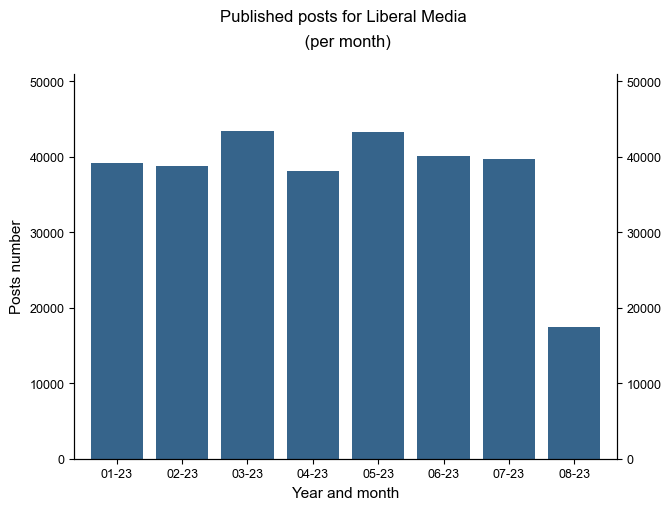

In [119]:
left_mediafb = prepro_graph(left_mediafb, ymax = 51000, group_name = "Liberal Media", graph = True, figsize=(7,5))

In [120]:
right_mediafb = pd.read_csv('data_crowdt/2023-08-14-13-44-21-CEST-Historical-Report-USA-Media-Right---SMDA-Project-2020-08-06--2023-08-14.csv')

C:\Users\agust\AppData\Local\Temp\ipykernel_22692\3306290532.py:1: DtypeWarning: Columns (37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  right_mediafb = pd.read_csv('data_crowdt/2023-08-14-13-44-21-CEST-Historical-Report-USA-Media-Right---SMDA-Project-2020-08-06--2023-08-14.csv')


In [121]:
print(len(right_mediafb))

300000


Published posts per month
Date  Date
2022  9        2734
      10      28965
      11      29096
      12      28794
2023  1       29502
      2       26940
      3       28262
      4       28225
      5       29639
      6       28055
      7       27878
      8       11910
Name: Date, dtype: int64


C:\Users\agust\AppData\Local\Temp\ipykernel_22692\3380085468.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


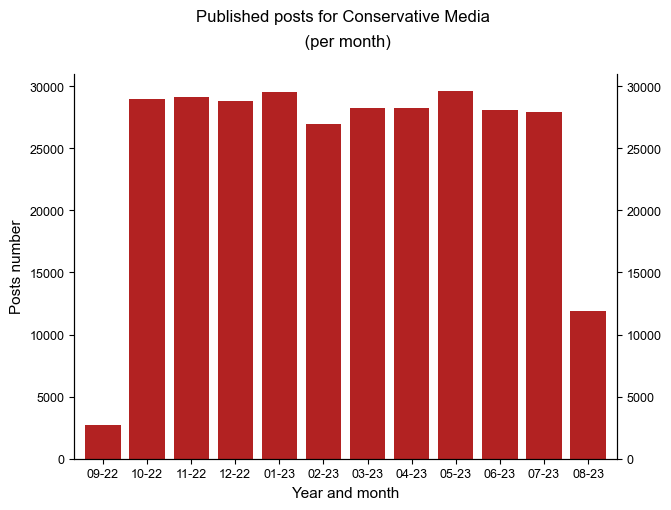

In [122]:
right_mediafb = prepro_graph(right_mediafb, ymax = 31000, group_name="Conservative Media", graph = True, figsize=(7,5))

CONGRESS data

In [123]:
dem_house = pd.read_csv('data_crowdt/2023-08-14-18-42-12-CEST-Historical-Report-US-House-Democrats-2020-07-02--2023-08-13.csv')

C:\Users\agust\AppData\Local\Temp\ipykernel_22692\1017912044.py:1: DtypeWarning: Columns (37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  dem_house = pd.read_csv('data_crowdt/2023-08-14-18-42-12-CEST-Historical-Report-US-House-Democrats-2020-07-02--2023-08-13.csv')


C:\Users\agust\AppData\Local\Temp\ipykernel_22692\3380085468.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


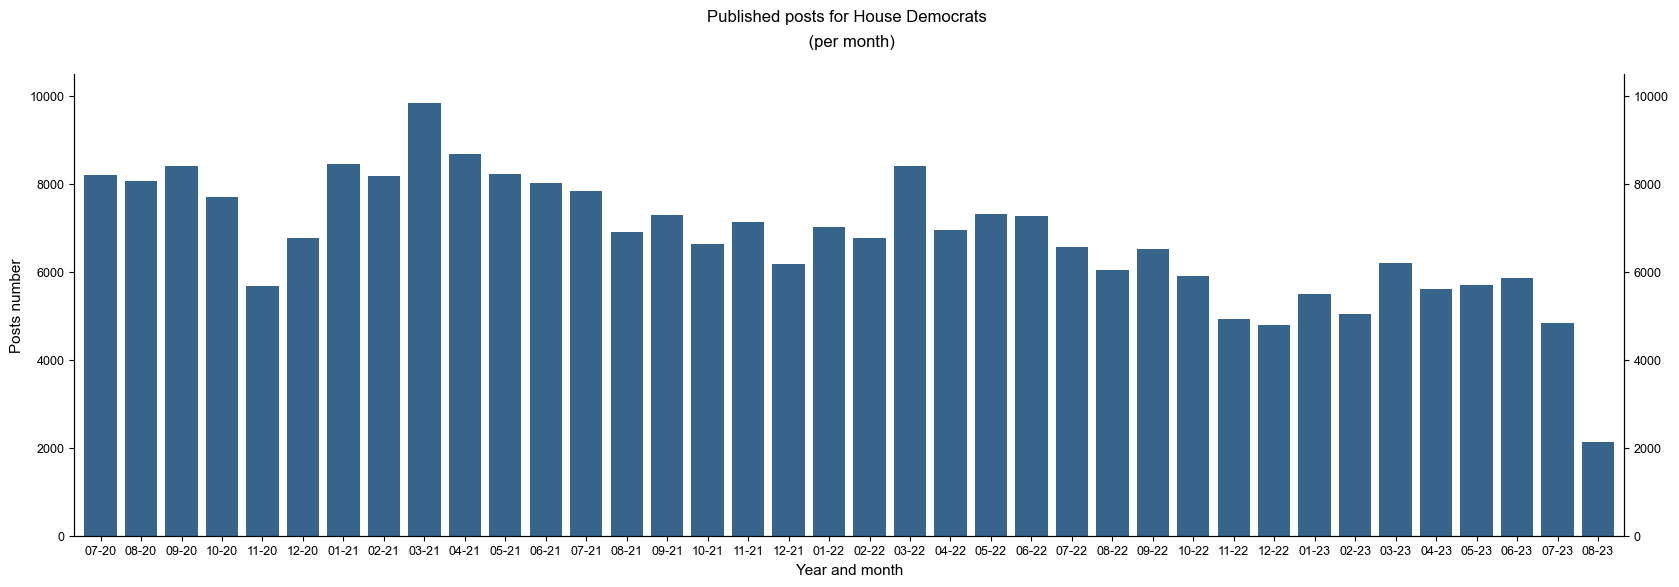

In [124]:
dem_house = prepro_graph(dem_house, ymax = 10500, group_name="House Democrats", output = False, graph = True)

In [125]:
dem_senate = pd.read_csv('data_crowdt/2023-08-14-18-08-59-CEST-Historical-Report-US-Senate-Democrats-2020-07-02--2023-08-13.csv')

C:\Users\agust\AppData\Local\Temp\ipykernel_22692\2242937096.py:1: DtypeWarning: Columns (37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  dem_senate = pd.read_csv('data_crowdt/2023-08-14-18-08-59-CEST-Historical-Report-US-Senate-Democrats-2020-07-02--2023-08-13.csv')


C:\Users\agust\AppData\Local\Temp\ipykernel_22692\3380085468.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


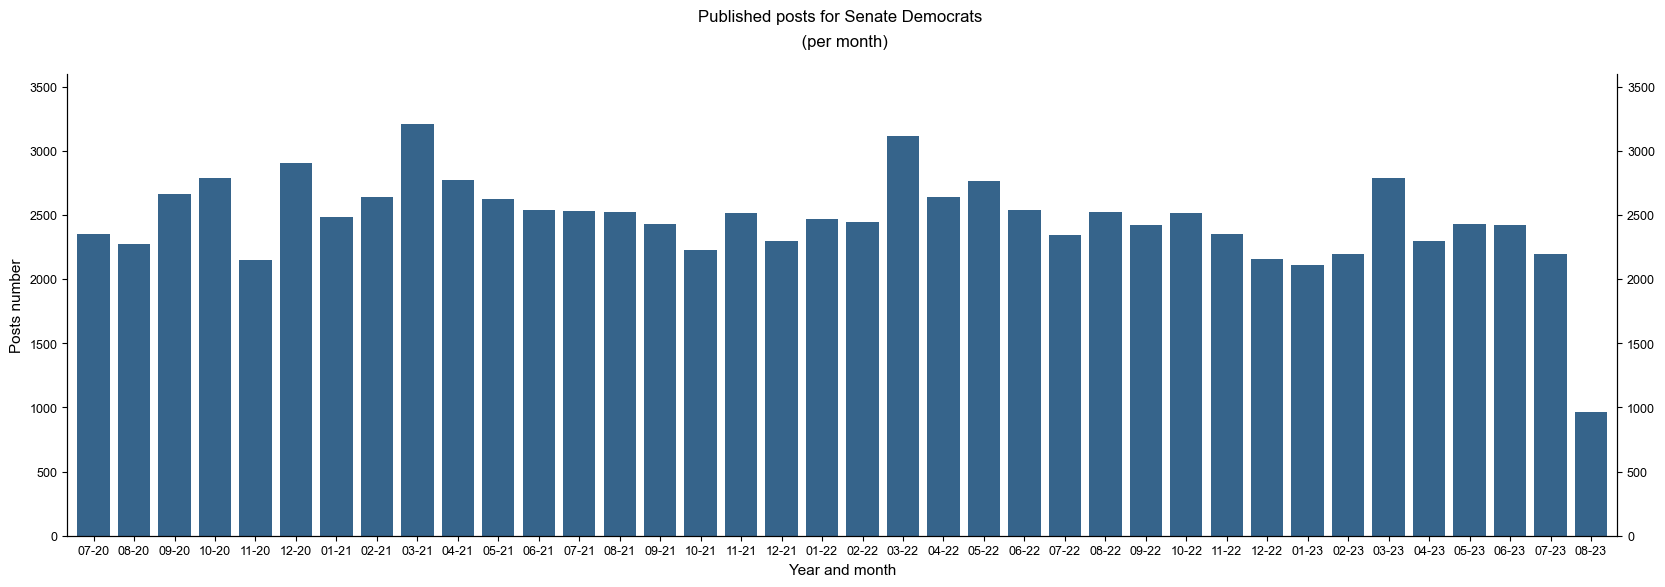

In [126]:
dem_senate = prepro_graph(dem_senate, ymax =3600, group_name="Senate Democrats", output = False, graph = True)

In [127]:
rep_house = pd.read_csv('data_crowdt/2023-08-14-18-33-49-CEST-Historical-Report-US-House-Republicans-2020-07-02--2023-08-13.csv')

C:\Users\agust\AppData\Local\Temp\ipykernel_22692\2348071244.py:1: DtypeWarning: Columns (37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  rep_house = pd.read_csv('data_crowdt/2023-08-14-18-33-49-CEST-Historical-Report-US-House-Republicans-2020-07-02--2023-08-13.csv')


C:\Users\agust\AppData\Local\Temp\ipykernel_22692\3380085468.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


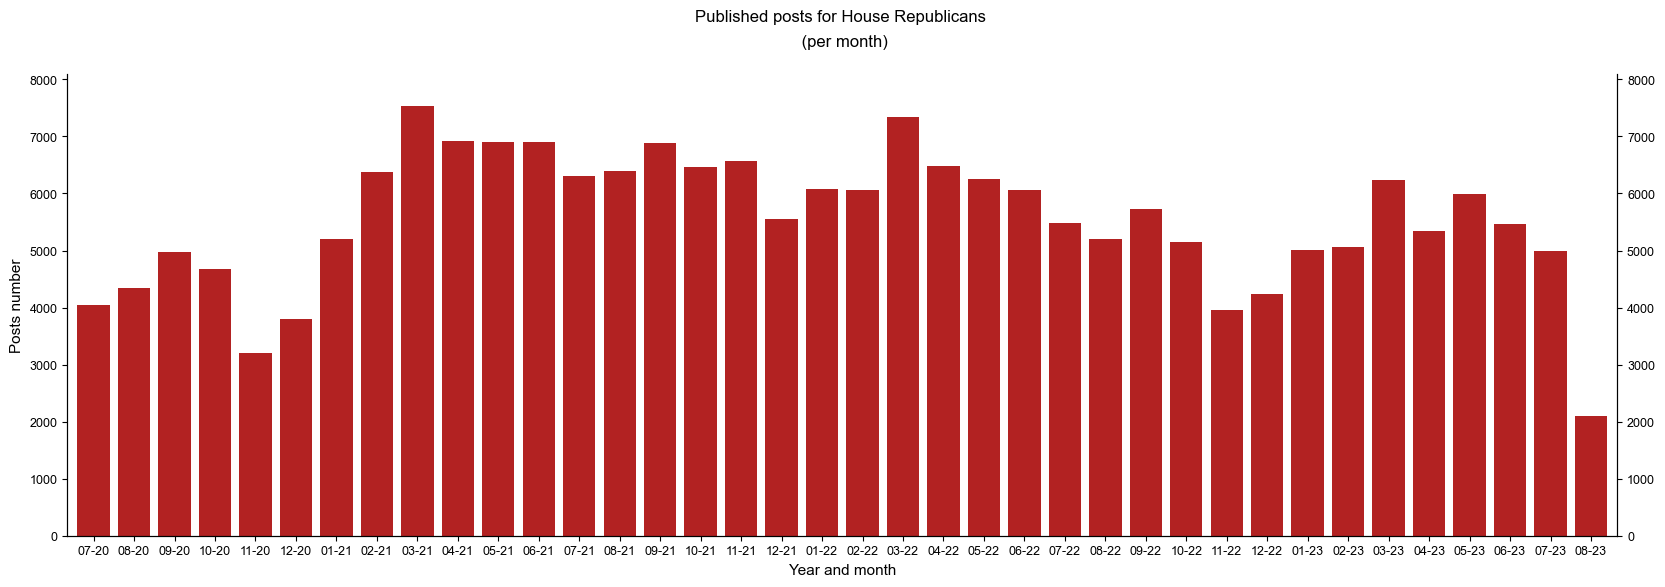

In [128]:
rep_house = prepro_graph(rep_house, ymax = 8100,group_name="House Republicans", output = False, graph = True)

In [129]:
rep_senate = pd.read_csv('data_crowdt/2023-08-14-17-56-44-CEST-Historical-Report-US-Senate-Republicans-2020-07-02--2023-08-13.csv')

C:\Users\agust\AppData\Local\Temp\ipykernel_22692\3380085468.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


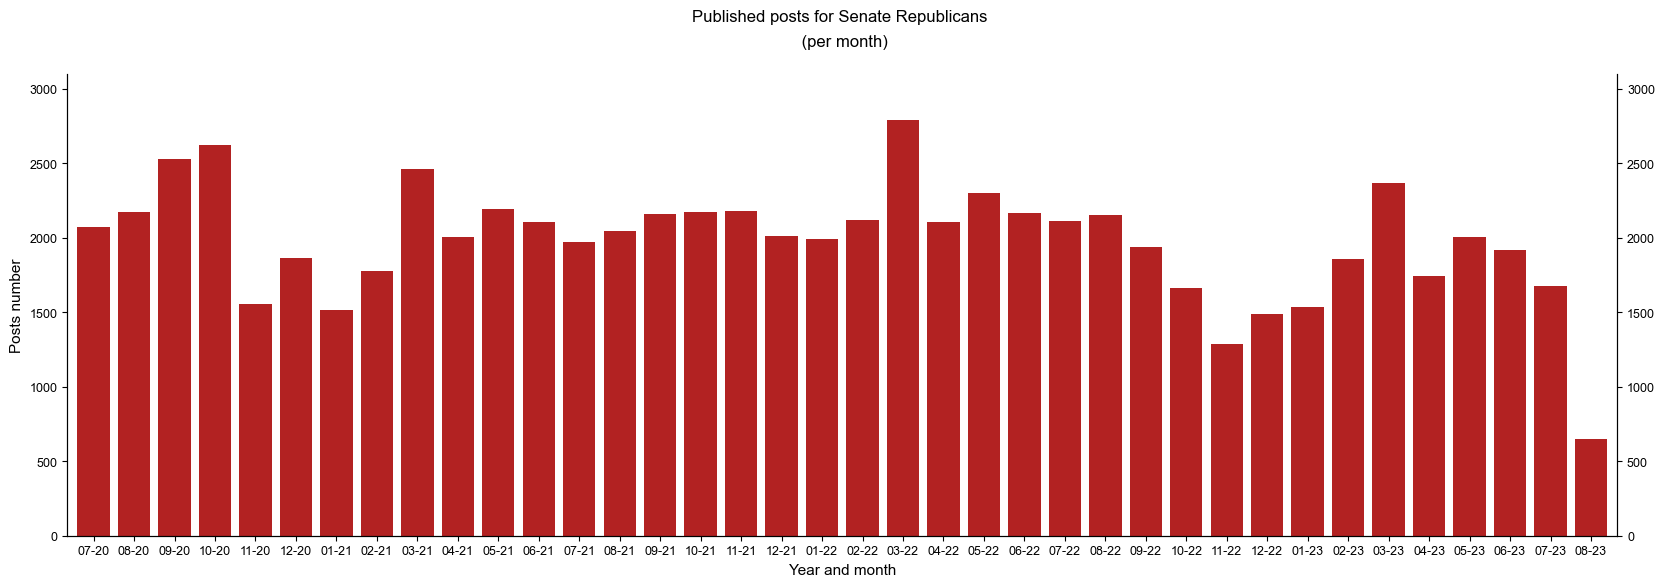

In [130]:
rep_senate = prepro_graph(rep_senate, ymax = 3100,group_name="Senate Republicans", output = False, graph = True)

In [131]:
print("Number of posts for retrieved congress data") 

print()
print("US House Democrats: ", len(dem_house))
print("US Senate Democrats: ", len(dem_senate))
dem_len = len(dem_house) + len(dem_senate)
print("US Democrats: ", dem_len)

print()
print("US House Republicans: ", len(rep_house))
print("US Senate Republicans: ", len(rep_senate))
rep_len = len(rep_house) + len(rep_senate)
print("US Republicans: ", rep_len)
print()

dash = '-' * 60
print(dash)
print("Original paper and replication differences")

print()
print("Original Paper (Republicans - Democrats): ", 458582 - 366842)
print("Replication (Democrats - Republicans): ", dem_len - rep_len)

print()
print("Original Paper (tot): ", 458582 + 366842)
print("Replication (tot): ", dem_len + rep_len)
print("N difference: ", 458582 + 366842 - dem_len - rep_len)


Number of posts for retrieved congress data

US House Democrats:  257506
US Senate Democrats:  93600
US Democrats:  351106

US House Republicans:  211320
US Senate Republicans:  75232
US Republicans:  286552

------------------------------------------------------------
Original paper and replication differences

Original Paper (Republicans - Democrats):  91740
Replication (Democrats - Republicans):  64554

Original Paper (tot):  825424
Replication (tot):  637658
N difference:  187766


In [132]:
#House and Senate differences aren't of interest dfs merge
dem_congress = pd.concat([dem_house, dem_senate], ignore_index=True)
rep_congress = pd.concat([rep_house, rep_senate], ignore_index=True)

C:\Users\agust\AppData\Local\Temp\ipykernel_22692\3380085468.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


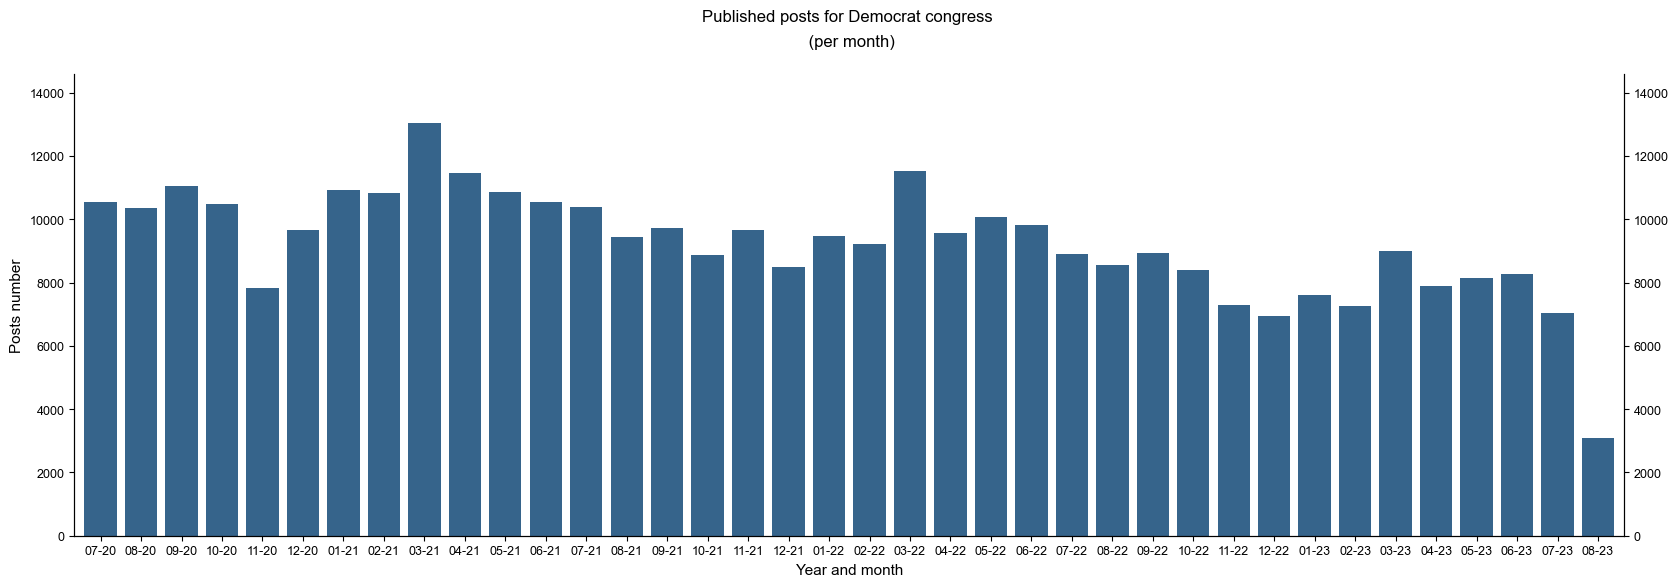

In [201]:
dems = prepro_graph(dem_congress, ymax = 14600, group_name="Democrat congress", output = False, graph = True)

C:\Users\agust\AppData\Local\Temp\ipykernel_22692\3380085468.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


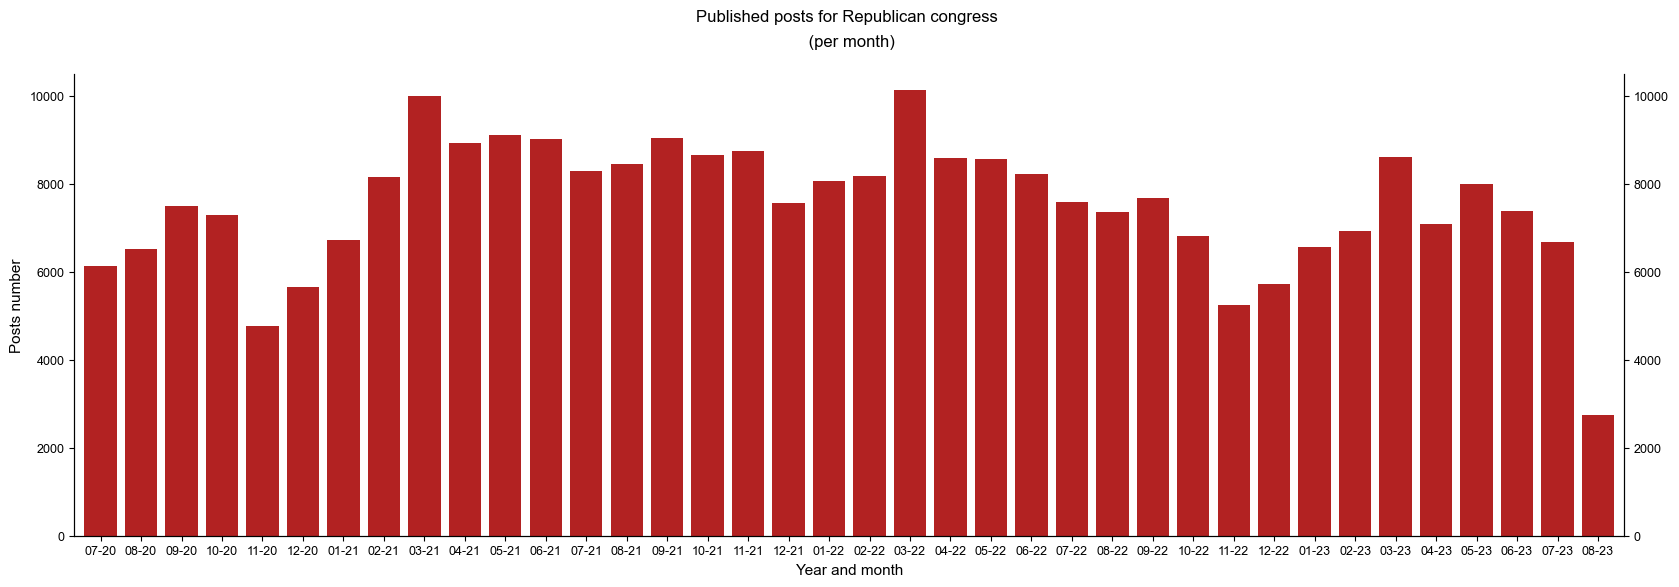

In [208]:
reps = prepro_graph(rep_congress, ymax = 10500, group_name="Republican congress", output = False, graph = True)

DICTIONARIES

Scraped current congress members

In [133]:
#congress_link = "https://ballotpedia.org/List_of_current_members_of_the_U.S._Congress"
#header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

##Scrape it with requests and make it easier to handle with Beautifulsoup
#congress_get = requests.get(congress_link, headers = header)
#congress_soup = BeautifulSoup(congress_get.content, 'html.parser') 
#print(congress_soup.prettify())

In [134]:
#table = pd.read_html(congress_get.text)
#df_senate = table[3] #List of current U.S. Senate members
#df_house = table[6] #List of current U.S. House members

In [135]:
#Export tables

#df_senate.to_pickle("dictionaries/118th_senate")
#df_house.to_pickle("dictionaries/118th_house")

In [136]:
#DF with Name and Party of congress members
df_senate = pd.read_pickle("dictionaries/118th_senate")
df_house = pd.read_pickle("dictionaries/118th_house")
df_house.columns

Index(['Office', 'Name', 'Party'], dtype='object')

In [137]:
# Make lists of congress members for each party and add an
# additional entry for members with middle initial. 
# Is useful to append names without middle initial because this many times not written.

def retrieve_members(df):
    names = df.Name.to_list()
    parties = df.Party.to_list()

    rep = []
    dem = []
    for i, party in enumerate(parties):
        if party == "Republican":
            rep.append(names[i])
        if party == "Democratic":
            dem.append(names[i])

    pattern =  r" [A-Z]. "
    for member in rep:
        if re.search(pattern, member):
            rep.append(re.sub(' [A-Z]. ', ' ', member))
    
    for member in dem:
        if re.search(pattern, member):
            dem.append(re.sub(' [A-Z]. ', ' ', member))

    return rep, dem


In [138]:
#Get list of congress members for each legislative body and party 
senate_rep, senate_dem = retrieve_members(df_senate)
house_rep, house_dem = retrieve_members(df_house)

#Merge both bodies
congress_rep = senate_rep + house_rep
congress_dem = senate_dem + house_dem


Import previous congress members

In [139]:
with open("dictionaries/DemocratCongressFB.txt") as fle:
    #Filter empty strings
    prev_congress_dem0 = list(filter(None, fle.read().split('\n')))

with open("dictionaries/RepublicansCongressFB.txt") as fle:
    #Filter empty strings
    prev_congress_rep0 = list(filter(None, fle.read().split('\n')))

In [140]:
#\xa0 removed (nonbreaking space for FB links)
prev_congress_dem = [re.sub(r"\xa0", " ", i) for i in prev_congress_dem0]
prev_congress_rep = [re.sub(r"\xa0", " ", i) for i in prev_congress_rep0]

Updated 100 most famous

In [141]:
#Updated manually by looking which personalities werent in the list already and adding their FB accounts too
#scrapping for this task wasnt succesful because they page had a dynamic table

#Import, make a list with split and erase empty strings
with open("dictionaries/MostFamousDemocratsFacebook-Repl.txt") as fle:
    #Filter empty strings
    famous_dem = list(filter(None, fle.read().split('\n')))

with open("dictionaries/MostFamousRepublicansFacebook-Repl.txt") as fle:
    #Filter empty strings
    famous_rep = list(filter(None, fle.read().split('\n')))

In [142]:
print(len(famous_rep))
print(len(famous_dem))


183
209


Import identity files (vocatives and words that refer to both parties)

In [143]:
#Import and make a list with split
with open("dictionaries/ConservativeIdentity-Repl.txt") as fle:
    ConservativeIdentity = fle.read().split('\n')

with open("dictionaries/LiberalIdentity-Repl.txt") as fle:
    LiberalIdentity = fle.read().split('\n')


In [144]:
#ConservativeIdentity
#LiberalIdentity

Join lists of congress members, famous politicians and identity references

In [145]:
#Since these two dictionaries will be merged with dictionaries that have names
#words that can't be extended are marked with a \b (word boundary) at the end
for i, word in enumerate(LiberalIdentity):
    if word[-1] != "*":
        LiberalIdentity[i] = word + "\\b"

for i, word in enumerate(ConservativeIdentity):
    if word[-1] != "*":
        ConservativeIdentity[i] = word + "\\b"

In [146]:
#Current congress members, previous congress members, famous representatives and ideological identities
democrats_dict0 = congress_dem + prev_congress_dem + famous_dem + LiberalIdentity
republicans_dict0 = congress_rep + prev_congress_rep + famous_rep + ConservativeIdentity

#Remove duplicates (e.g. congress members that are also famous or previous that are current)
democrats_dict = list(set(democrats_dict0))
republicans_dict = list(set(republicans_dict0))

print(len(democrats_dict0))
print(len(democrats_dict))
print()
print(len(republicans_dict0))
print(len(republicans_dict))

1078
775

1024
746


Erase meronymes for faster processing (using dictionary methods "Greg Pence" also finds "U.S. Representative Greg Pence")

In [147]:
def avoid_meronymy(string_list):
    #order list by length from short to long
    string_list.sort(key=lambda s: len(s), reverse = False)
    out = []
    
    #Check if a (longer) string is already contained in the new list
    for s in string_list:
        if not any([o in s for o in out]):
            out.append(s)
            
    return out

In [148]:
#function check
ls = ['resting', 'looking','rest', 'look', 'hamlet']
avoid_meronymy(ls)

['rest', 'look', 'hamlet']

In [149]:
#Erase holonymes, final democrats and republicans references
dem_ref = avoid_meronymy(democrats_dict)
rep_ref = avoid_meronymy(republicans_dict)

In [150]:
print(len(dem_ref))
print(len(rep_ref))

564
547


Positive affect dictionary

In [151]:
with open("dictionaries/Affect_neg.txt") as fle:
    affect_neg_dict = fle.read().split('\n')

In [152]:
#affect_neg_dict

Negative affect dictionary

In [153]:
with open("dictionaries/Affect_pos.txt") as fle:
    affect_pos_dict = fle.read().split('\n')

In [154]:
#affect_pos_dict

Moral-emotional dictionary

In [155]:
with open("dictionaries/MoralEmotional-Repl.txt") as fle:
    moral_emo_dict = fle.read().split('\n')

In [156]:
#moral_emo_dict

In [157]:
#Consolidation of all dicts as list for easier sharing
counting_dicts = {'democrat_terms' : dem_ref, 'republican_terms' : rep_ref, \
                  'affect_neg_terms' : affect_neg_dict, 'affect_pos_terms' : affect_pos_dict, \
                  'moral_emo_terms' : moral_emo_dict}

#Export for share
with open('dictionaries/all_dicts.pickle', 'wb') as handle:
    pickle.dump(counting_dicts, handle, protocol=pickle.HIGHEST_PROTOCOL)

#with open('dictionaries/all_dicts.pickle', 'rb') as handle:
#    counting_dicts2 = pickle.load(handle)

TEST. Creating word count variables with the dictionaries

In [158]:
test_df = pd.DataFrame({'Message': ["sara and sara mccarty are sad and hap py", 'my life happy']})
#count check
#meronymy behavoir check

In [159]:
name_emotion_dicts = {'names': ['John', 'Sara', 'Sara mccarty', 'David', 'Emily'], \
                      'emotions': ['happy', 'sad']}

#Make lists a useful string for regex
names = '|'.join(name_emotion_dicts['names'])
emotions = '|'.join(name_emotion_dicts['emotions'])

In [160]:
def count_names_emotions(message):
        
    name_count = len(re.findall(rf'\b({names})\b', message, flags = re.IGNORECASE))
    emotion_count = len(re.findall(rf'\b({emotions})\b', message, flags = re.IGNORECASE))
    
    return name_count, emotion_count

In [161]:
count_cols_test = ['name_count', 'emotion_count']
test_df[count_cols_test] = test_df['Message'].apply(lambda x: pd.Series(count_names_emotions(x)))


In [162]:
test_df

,Message,name_count,emotion_count
0,sara and sara mccarty are sad and hap py,2,1
1,my life happy,0,1


TEST. Use tokenization for word count. <br>
As it was first performed with regex and no additional benefit was found for tokenization <br>
(e.g. names with more than one word are better detected wiht regex), regex was used.

In [163]:
#nltk.download('punkt')

In [164]:
# stop_words = stopwords.words('english')

# # clean the input, tokenize, lowercase, remove special characters, 
# # punctuation marks, stopwords, apply stemmer

# def tokenizer(str_input):
#     if isinstance(str_input, str):
#         words = nltk.word_tokenize(str_input)
        
#         filtered_sentence = []
#         for w in words: 
#             w = w.lower() 
#             if w.isalnum(): #remove all punctuation marks, and words with punctuation (e.g. URLs)
#               if w not in stop_words: 
#                     filtered_sentence.append(w) 
#     else:
#         filtered_sentence = []
                
#     return filtered_sentence

In [165]:
#tokenizer(rep_house_min["Message"][0])

In [166]:
#tokenizer(rep_house['Message'][211315])

In [167]:
#rep_house_min["tokens"] = rep_house_min["Message"].apply(lambda x: tokenizer(x))

In [168]:
# def count_emotional_words(tokenized_sentence, emotional_words):
    
#     # Use list comprehension to check for matches
#     matches = [pattern.match(token) for token in tokenized_sentence for pattern in emotional_words]
    
#     # Count the non-None matches
#     count = sum(1 for match in matches if match is not None)
    
#     return count

Creating word count variables with the dictionaries

In [169]:
#Joining of dicts as strings and change for correct regex with Python
# * symbol is used for 0 or more repetitions of the singular preceding letter or symbol
# \w* symbol accounts for any alphanumeric character
democrat_terms   = '|'.join(dem_ref).replace(r'*', r'\w*')
republican_terms = '|'.join(rep_ref).replace(r'*', r'\w*')
affect_neg_terms = '|'.join(affect_neg_dict).replace(r'*', r'\w*')
affect_pos_terms = '|'.join(affect_pos_dict).replace(r'*', r'\w*')
moral_emo_terms  = '|'.join(moral_emo_dict).replace(r'*', r'\w*')

In [170]:
def count_terms(message, print_words = False):

    #NaN values of the message occur, for example, when only a photo is uploaded
    if isinstance(message, str):
        #No word bound \b used for democrat and republican terms since these are sometimes
        #used as part of mocking terms (e.g. "Bidenomics")
        dem = re.findall(r'\b(' + democrat_terms + r')', message, flags = re.IGNORECASE)
        rep = re.findall(r'\b(' + republican_terms + r')', message, flags = re.IGNORECASE)
        neg = re.findall(r'\b(' + affect_neg_terms + r')\b', message, flags = re.IGNORECASE)
        pos = re.findall(r'\b(' + affect_pos_terms + r')\b', message, flags = re.IGNORECASE)
        moral_emo = re.findall(r'\b(' + moral_emo_terms + r')\b', message, flags = re.IGNORECASE)

        dem_count = len(dem)
        rep_count = len(rep)
        neg_count = len(neg)
        pos_count = len(pos)
        affect_count = neg_count + pos_count
        moral_emo_count = len(moral_emo)

        if print_words == True:
            print("Democrat terms: ", dem)
            print("Republican terms: ", rep)
            print("Negative affect terms: ", neg)
            print("Positive affect terms: ", pos)
            print("Moral emotional terms: ", moral_emo)

    #When no message is written variables are set to 0
    else:
        dem_count, rep_count, neg_count, pos_count, affect_count, moral_emo_count = 0, 0, 0, 0, 0, 0
        
    return dem_count, rep_count, neg_count, pos_count, affect_count, moral_emo_count


In [171]:
#rep_house_min['Message'][0]
m = 'American families are paying $709 more for basic household Repub goods than they did two years ago. That’s Bidenomics at work Trump Biden.'

In [172]:
count_terms(m, True)

Democrat terms:  ['Biden', 'Biden']
Republican terms:  ['Repub', 'Trump']
Negative affect terms:  []
Positive affect terms:  []
Moral emotional terms:  []


(2, 2, 0, 0, 0, 0)

Check function with a small dataset

In [173]:
#Check common outputs for a sample of posts (also done for the different type of pages)
dem_con_min = dem_congress[:100]
for i in range(20, 30):
    print(dem_con_min["Message"][i])
    print(count_terms(dem_con_min["Message"][i], print_words = True))

Important reminder if you’re traveling with critters.
Democrat terms:  []
Republican terms:  []
Negative affect terms:  []
Positive affect terms:  ['Important']
Moral emotional terms:  []
(0, 0, 0, 1, 1, 0)
My heart and prayers go out to the families who lost their loved ones in the Maui wildfires. To the first responders - Thank you, for your courage, dedication and commitment and @POTUS for providing federal resources. Please continue to follow evacuation orders and stay safe.
Democrat terms:  []
Republican terms:  []
Negative affect terms:  ['lost']
Positive affect terms:  ['loved', 'Thank', 'courage', 'commitment', 'Please', 'safe']
Moral emotional terms:  ['safe']
(0, 0, 1, 6, 7, 1)
These never-ending reports about the Supreme Court justices’ ethics violations (and terrible, extreme decisions) have led many of us, including me, to lose faith in the Supreme Court. We need enforceable ethical standards, accountability, and structural reform in the Court.
Democrat terms:  []
Republic

In [174]:
rep_house_min = rep_house[:100]

In [175]:
#Check common outputs for a sample of posts (also done for the different type of pages)
for i in range(30, 40):
    print(rep_house_min["Message"][i])
    print(count_terms(rep_house_min["Message"][i], print_words = True))

Congratulations to the Hutchinson Monarchs, who made history Saturday night when they defeated the Santa Barbara Foresters to win the National Baseball Congress World Series Championship! This is the first NBCWS championship in the team’s history. Go Monarchs!
Democrat terms:  []
Republican terms:  []
Negative affect terms:  []
Positive affect terms:  ['win', 'Championship', 'championship']
Moral emotional terms:  []
(0, 0, 0, 3, 3, 0)
Join me in wishing my incredible wife, Erika, a very happy birthday! I’m blessed to have such a supportive, loving, and devoted wife by my side every step of the way. She’s the greatest mom to our three boys, a leader in our community, and the best partner. I love you! 🎂🎉
Democrat terms:  []
Republican terms:  []
Negative affect terms:  []
Positive affect terms:  ['happy', 'blessed', 'supportive', 'loving', 'devoted', 'best', 'love']
Moral emotional terms:  ['devoted']
(0, 0, 0, 7, 7, 1)
Today we remember and honor Opha May Johnson. On this day in 1918, 

In [176]:
#Columns names list
count_cols = ['dem_count', 'rep_count', 'neg_count', 'pos_count', 'affect_count', 'moral_emo_count']

#Copy to avoid original df problems
rep_house_min_results = rep_house_min.copy()
rep_house_min_results[count_cols] = rep_house_min['Message'].apply(lambda x: pd.Series(count_terms(str(x))))

In [177]:
rep_house_min_results[count_cols] 

,dem_count,rep_count,neg_count,pos_count,affect_count,moral_emo_count
0,1,0,0,0,0,0
1,0,1,0,1,1,0
2,0,0,0,1,1,0
3,0,0,0,2,2,0
4,0,0,1,4,5,2
...,...,...,...,...,...,...
95,0,0,0,6,6,0
96,2,1,2,0,2,0
97,0,0,2,7,9,2
98,0,0,0,3,3,1


In [178]:
rep_house_min_results.head(3)

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Sponsor Name,Sponsor Category,Overperforming Score,Date,dem_count,rep_count,neg_count,pos_count,affect_count,moral_emo_count
0,Rep. Randy Feenstra,RepFeenstra,100064273982108,GOVERNMENT_OFFICIAL,US,Delivering results for the people of Iowa's 4t...,2021-01-02 15:41:50,3499.0,3801.0,2023-08-13 23:49:32 CEST,...,NaN,NaN,-1.17,2023-08-01,1,0,0,0,0,0
1,"Congressman Greg Murphy, MD",RepGregMurphy,100050504288805,POLITICIAN,US,Proudly representing the people of the Third C...,2015-12-20 01:15:36,19907.0,21343.0,2023-08-13 23:10:55 CEST,...,NaN,NaN,-2.46,2023-08-01,0,1,0,1,1,0
2,Congresswoman Beth Van Duyne,RepBethVanDuyne,100063516888699,GOVERNMENT_OFFICIAL,US,Proudly representing North Texas. American by ...,2020-12-17 19:03:26,7194.0,7582.0,2023-08-13 23:08:00 CEST,...,NaN,NaN,-2.83,2023-08-01,0,0,0,1,1,0


Apply function to all dfs

In [179]:
#Function to create a df with the results for the dfs of congress pages, media for both parties

def dictionary_columns(df):
    df_results = df.copy()

    count_cols = ['dem_count', 'rep_count', 'neg_count', 'pos_count', 'affect_count', 'moral_emo_count']
    df_results[count_cols] = df_results['Message'].progress_apply(lambda x: pd.Series(count_terms(str(x))))

    return df_results


Democrat congress members and media counts

In [180]:
#dem_congress_results = dictionary_columns(dem_congress)

In [181]:
#dem_congress_results.to_pickle("analysis_df/dem_congress_countcol")

In [182]:
#left_mediafb_results = dictionary_columns(left_mediafb)

In [183]:
#left_mediafb_results.to_pickle("analysis_df/left_mediafb_countcol")

Republican congress members and media counts

In [184]:
#rep_congress_results = dictionary_columns(rep_congress)

In [185]:
#rep_congress_results.to_pickle("analysis_df/rep_congress_countcol")

In [186]:
#right_mediafb_results = dictionary_columns(right_mediafb)

In [187]:
#right_mediafb_results.to_pickle("analysis_df/right_mediafb_countcol")


In [188]:
#Import the above
dem_congress_countcol = pd.read_pickle("analysis_df/dem_congress_countcol")
left_mediafb_countcol = pd.read_pickle("analysis_df/left_mediafb_countcol")
rep_congress_countcol = pd.read_pickle("analysis_df/rep_congress_countcol")
right_mediafb_countcol = pd.read_pickle("analysis_df/right_mediafb_countcol")